In [1]:
from dssat_run import run_district

In [2]:
yield_results = {}

# Ideal case (No stress)

In [3]:
%time
# Turn off Water and Nitrogen Switches
sim_controls = {
    "WATER": "N", "NITRO": "N"
}
df, overview = run_district("Chivi", 2020, sim_controls=sim_controls)
yield_results["No stress"] = df

CPU times: user 6 μs, sys: 0 ns, total: 6 μs
Wall time: 13.4 μs


# Only water Stress (no nitrogen stress)

In [4]:
%time
sim_controls = {
    "WATER": "Y", "NITRO": "N"
}
df, overview = run_district("Chivi", 2020, sim_controls=sim_controls)
yield_results["Only water stress"] = df

CPU times: user 7 μs, sys: 0 ns, total: 7 μs
Wall time: 13.4 μs


# Rainfed

In [5]:
%time
sim_controls = {
    "WATER": "Y", "NITRO": "Y"
}
df, overview = run_district("Chivi", 2020, sim_controls=sim_controls)
yield_results["Rainfed"] = df

CPU times: user 7 μs, sys: 0 ns, total: 7 μs
Wall time: 14.5 μs


# Automatic irrigation

## refill from 25%

In [6]:
%time
sim_controls = {
    "WATER": "Y", "NITRO": "Y",
    "IRRIG": "N", "IMDEP": 30, "ITHRL": 25, "ITHRU": 100
}
df, overview = run_district("Chivi", 2020, sim_controls=sim_controls)
yield_results["Irrigation (25%)"] = df

CPU times: user 7 μs, sys: 0 ns, total: 7 μs
Wall time: 14.3 μs


## Refill from 50%

In [7]:
%time
sim_controls = {
    "WATER": "Y", "NITRO": "Y",
    "IRRIG": "N", "IMDEP": 30, "ITHRL": 50, "ITHRU": 100
}
df, overview = run_district("Chivi", 2020, sim_controls=sim_controls)
yield_results["Irrigation (50%)"] = df

CPU times: user 6 μs, sys: 1 μs, total: 7 μs
Wall time: 13.8 μs


## Refill from 75%

In [8]:
%time
sim_controls = {
    "WATER": "Y", "NITRO": "Y",
    "IRRIG": "N", "IMDEP": 30, "ITHRL": 75, "ITHRU": 100
}
df, overview = run_district("Chivi", 2020, sim_controls=sim_controls)
yield_results["Irrigation (50%)"] = df

CPU times: user 5 μs, sys: 1e+03 ns, total: 6 μs
Wall time: 11 μs


# Apply Nitrogen (No irrigation)

Under Zimbabwean conditions Maize generally requires 70 kg/ha [(FAO)](https://www.fao.org/4/a0395e/a0395e0a.htm)
## 25% recommended

In [9]:
%time
n_rate_base = 70
sim_controls = {
    "WATER": "Y", "NITRO": "Y",
}
df, overview = run_district("Chivi", 2020, n_rate_base*.25, sim_controls=sim_controls)
yield_results["Fertilizer (25%)"] = df

CPU times: user 6 μs, sys: 0 ns, total: 6 μs
Wall time: 13.1 μs


## 50% recommended

In [10]:
%time
sim_controls = {
    "WATER": "Y", "NITRO": "Y",
}
df, overview = run_district("Chivi", 2020, n_rate_base*.50, sim_controls=sim_controls)
yield_results["Fertilizer (50%)"] = df

CPU times: user 6 μs, sys: 1 μs, total: 7 μs
Wall time: 11.9 μs


## 100% recommended

In [11]:
%time
sim_controls = {
    "WATER": "Y", "NITRO": "Y",
}
df, overview = run_district("Chivi", 2020, n_rate_base*1., sim_controls=sim_controls)
yield_results["Fertilizer (100%)"] = df

CPU times: user 6 μs, sys: 0 ns, total: 6 μs
Wall time: 12.9 μs


# Plot results

In [12]:
from matplotlib import pyplot as plt
import numpy as np

''

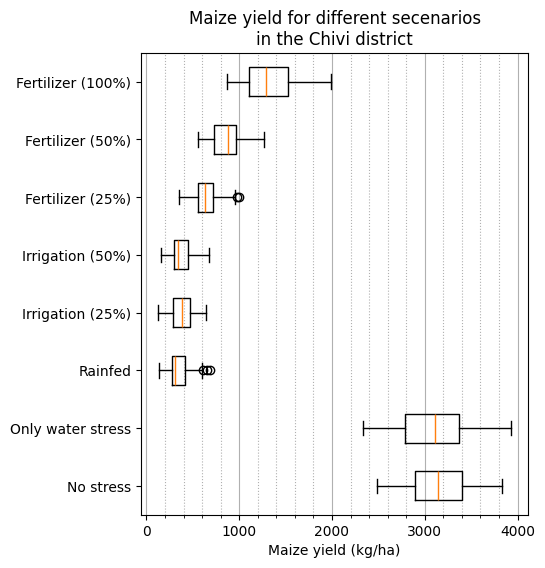

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
for n, (case, df) in enumerate(yield_results.items()):
    ax.boxplot(
        x=df.HARWT.astype(int),
        vert=False, positions=[n], widths=.5
    )
ax.set_yticklabels(yield_results.keys())
ax.set_xticks(np.arange(0, 4001, 1000), minor=False)
ax.grid(linestyle='-', which="major", axis="x")
ax.set_xticks(np.arange(0, 4001, 200), minor=True)
ax.grid(linestyle=':', which="minor", axis="x")
ax.set_xlabel("Maize yield (kg/ha)")
ax.set_title("Maize yield for different secenarios\nin the Chivi district")
;